# Data Management and Preprocessing

## Objective:

We will dive into the world of data management and pre-processing for financial services using a dataset from LendingClub. The goal is to apply essential data cleaning and transformation techniques to prepare the data for further analysis and modeling.

# Load The Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('accepted_2007_to_2018q4.csv', low_memory=False)

# Data Exploration (EDA)

In [3]:
#explored column types this way because dtype function was cutting off due to large amount of cols
for col in data.columns:
    print(col, '->', data[col].dtype)

id -> object
member_id -> float64
loan_amnt -> float64
funded_amnt -> float64
funded_amnt_inv -> float64
term -> object
int_rate -> float64
installment -> float64
grade -> object
sub_grade -> object
emp_title -> object
emp_length -> object
home_ownership -> object
annual_inc -> float64
verification_status -> object
issue_d -> object
loan_status -> object
pymnt_plan -> object
url -> object
desc -> object
purpose -> object
title -> object
zip_code -> object
addr_state -> object
dti -> float64
delinq_2yrs -> float64
earliest_cr_line -> object
fico_range_low -> float64
fico_range_high -> float64
inq_last_6mths -> float64
mths_since_last_delinq -> float64
mths_since_last_record -> float64
open_acc -> float64
pub_rec -> float64
revol_bal -> float64
revol_util -> float64
total_acc -> float64
initial_list_status -> object
out_prncp -> float64
out_prncp_inv -> float64
total_pymnt -> float64
total_pymnt_inv -> float64
total_rec_prncp -> float64
total_rec_int -> float64
total_rec_late_fee -> floa

Based on looking at the column names and picking 3 numerical and 3 categorical variables I am selecting at random

Numerical: annual_inc_joint, total_pymnt, int_rate,
Categorical: addr_state, hardship_status, title

In [4]:
cols = ['annual_inc_joint', 'total_pymnt', 'int_rate','addr_state', 'hardship_status', 'title']
filtered_data = data[cols]
display(filtered_data.head())

,annual_inc_joint,total_pymnt,int_rate,addr_state,hardship_status,title
0,NaN,4421.723917,13.99,PA,NaN,Debt consolidation
1,NaN,25679.660000,11.99,SD,NaN,Business
2,71000.0,22705.924294,10.78,IL,NaN,NaN
3,NaN,31464.010000,14.85,NJ,NaN,Debt consolidation
4,NaN,11740.500000,22.45,PA,NaN,Major purchase


In [5]:
filtered_data.shape

(2260701, 6)

In [6]:
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        print(col, ' unique value count -> ',filtered_data[col].nunique())

addr_state  unique value count ->  51
hardship_status  unique value count ->  3
title  unique value count ->  63154


In [7]:
cols.remove('title')
cols.append('sub_grade')
filtered_data = data[cols]

In [8]:
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        print(col, ' unique value count -> ',filtered_data[col].nunique())

addr_state  unique value count ->  51
hardship_status  unique value count ->  3
sub_grade  unique value count ->  35


In [9]:
filtered_data.describe()

,annual_inc_joint,total_pymnt,int_rate
count,1.207100e+05,2.260668e+06,2.260668e+06
mean,1.236246e+05,1.208256e+04,1.309283e+01
std,7.416135e+04,9.901383e+03,4.832138e+00
min,5.693510e+03,0.000000e+00,5.310000e+00
25%,8.340000e+04,4.546458e+03,9.490000e+00
50%,1.100000e+05,9.329720e+03,1.262000e+01
75%,1.479950e+05,1.694087e+04,1.599000e+01
max,7.874821e+06,6.329688e+04,3.099000e+01


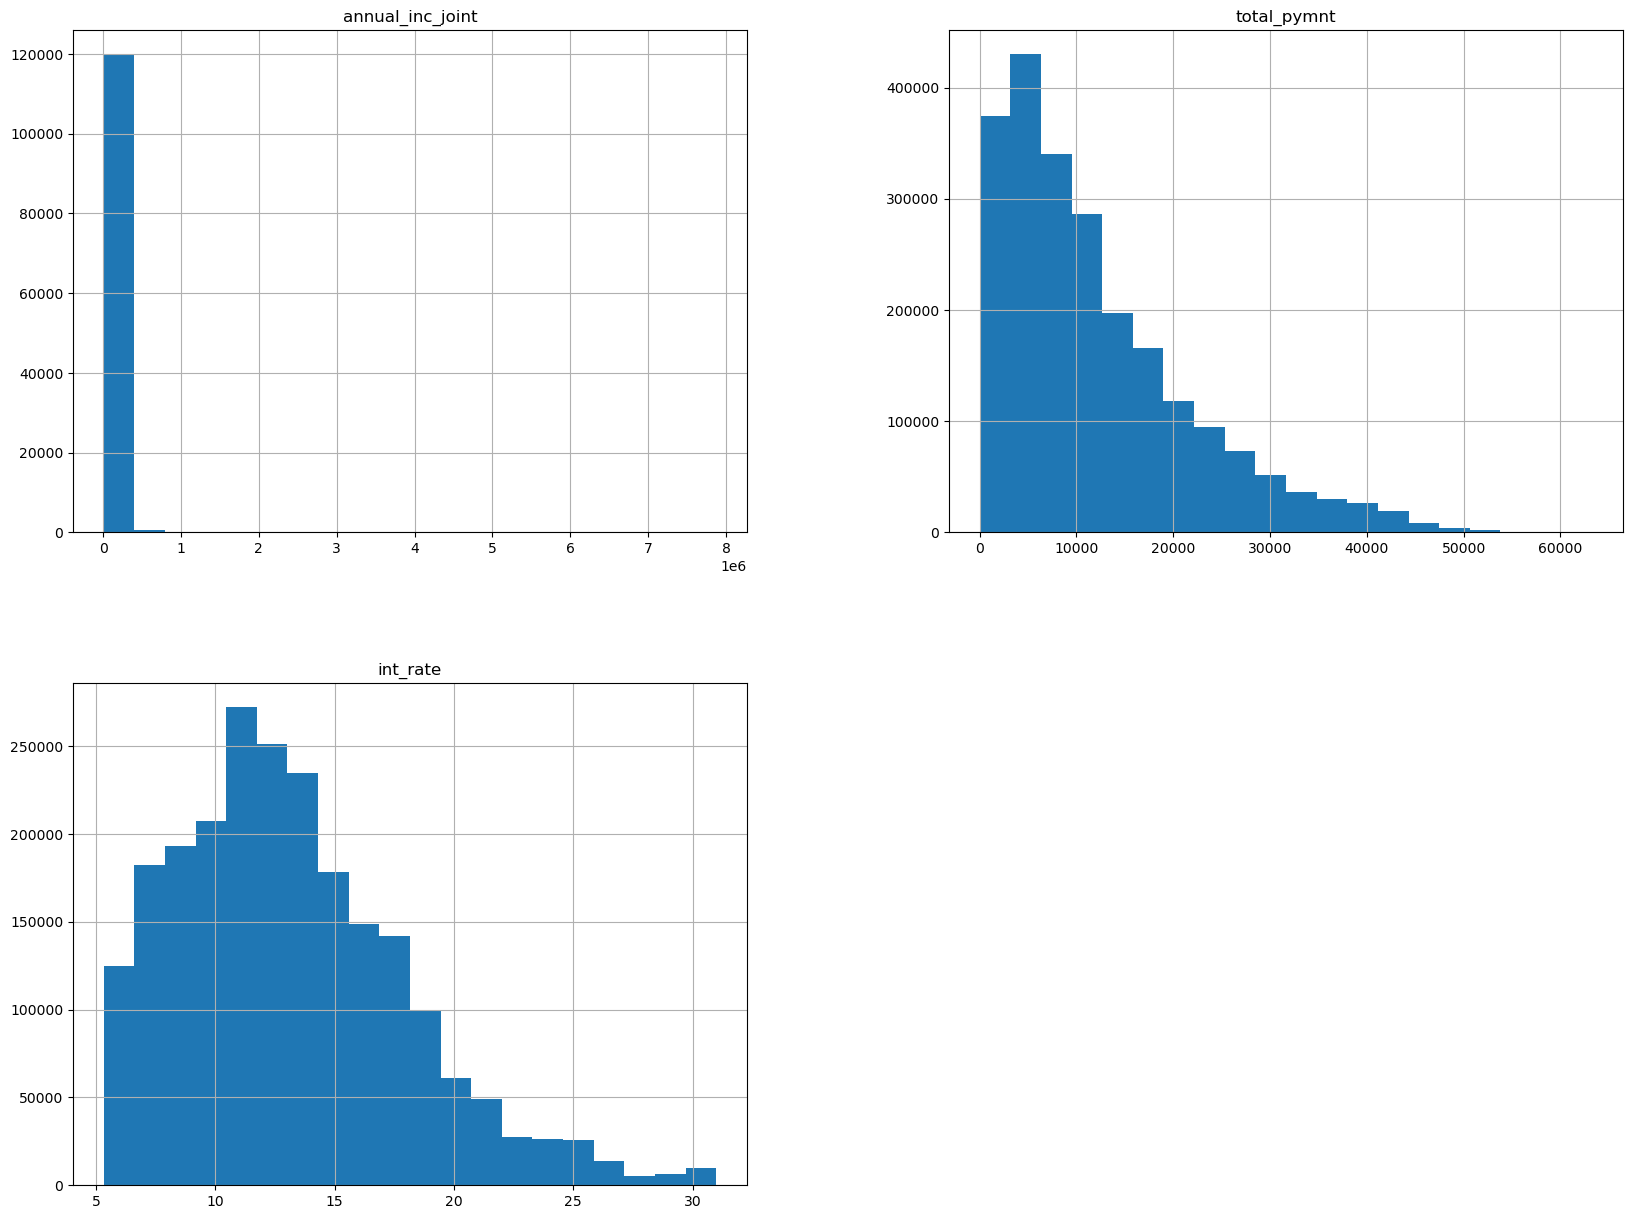

In [10]:
#create a visualization of histograms for all columns to see if any are tailed heavy or uniformly distributed
filtered_data.hist(bins = 20,figsize = (20,15))
plt.show()

Based on the info describe function and the graphs a few things are clear:
1. All the numerical categories chosen are using a different scale so this has to be standardized
2. Looks like annual_joint_inc is missing some values. Due to the distribution itll make most sense to replace nulls here with the mean or median since they are similar

Lets take a look at nulls in our other numerical and cat columns

In [11]:
for col in filtered_data.columns:
    print(col,' Null Value Count -> ',filtered_data[col].isnull().sum(), '\t\t\tNull Value Percentage -> ', (filtered_data[col].isnull().sum()/filtered_data.shape[0])*100)

annual_inc_joint  Null Value Count ->  2139991 			Null Value Percentage ->  94.66050574578416
total_pymnt  Null Value Count ->  33 			Null Value Percentage ->  0.0014597242182845054
int_rate  Null Value Count ->  33 			Null Value Percentage ->  0.0014597242182845054
addr_state  Null Value Count ->  33 			Null Value Percentage ->  0.0014597242182845054
hardship_status  Null Value Count ->  2249784 			Null Value Percentage ->  99.51709668815116
sub_grade  Null Value Count ->  33 			Null Value Percentage ->  0.0014597242182845054


Seems like a lot of nulls in the annual_inc_join and hardship_status columns. Lets verify this

In [12]:
filtered_data[filtered_data['annual_inc_joint'].isnull() == 1][['annual_inc_joint']]

,annual_inc_joint
0,NaN
1,NaN
3,NaN
4,NaN
5,NaN
...,...
2260696,NaN
2260697,NaN
2260698,NaN
2260699,NaN


In [13]:
filtered_data[filtered_data['hardship_status'].isnull() == 1][['hardship_status']]

,hardship_status
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2260696,NaN
2260697,NaN
2260698,NaN
2260699,NaN


In [14]:
filtered_data['hardship_status'].value_counts()

hardship_status
COMPLETED    7819
BROKEN       2266
ACTIVE        832
Name: count, dtype: int64

In [15]:
#Making sure sum of distinct values is same as total values - nulls
filtered_data['hardship_status'].value_counts().sum() == filtered_data.shape[0]-filtered_data['hardship_status'].isnull().sum()

True

# Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [19]:
#Instead of hardcoding I am making this automated. 
#If this were a production pipeline, I'd have more checks as objects can also be dates & other non-numerical types
#But because i know the 6 selected cols this works
num_cols = []
cat_cols = []
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [21]:
for col in cat_cols:
    filtered_data[col] = LabelEncoder().fit_transform(filtered_data[col])

/var/folders/0b/fh1gqtbn05g9vh4nkdbt85880000gp/T/ipykernel_52551/1295906332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = LabelEncoder().fit_transform(filtered_data[col])
/var/folders/0b/fh1gqtbn05g9vh4nkdbt85880000gp/T/ipykernel_52551/1295906332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = LabelEncoder().fit_transform(filtered_data[col])
/var/folders/0b/fh1gqtbn05g9vh4nkdbt85880000gp/T/ipykernel_52551/1295906332.py:2: SettingWithCopyWarning: 
A value i

In [22]:
display(filtered_data.head())

,annual_inc_joint,total_pymnt,int_rate,addr_state,hardship_status,sub_grade
0,NaN,4421.723917,13.99,38,3,13
1,NaN,25679.660000,11.99,41,3,10
2,71000.0,22705.924294,10.78,14,3,8
3,NaN,31464.010000,14.85,31,3,14
4,NaN,11740.500000,22.45,38,3,25


In [23]:
#This numerical piepline will fill nulls in numerical columns with median and scale everything as well
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#I am creating a full peipleine that also encodes the categorical variables including the nulls
#separated by specific cols
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_cols),
    ])

In [24]:
data_transformed = full_pipeline.fit_transform(filtered_data)

In [25]:
data_transformed = pd.DataFrame({
                            num_cols[0]: data_transformed[:, 0],
                            num_cols[1]: data_transformed[:, 1],
                            num_cols[2]: data_transformed[:, 2],

                            })

In [26]:
for col in cat_cols:
    data_transformed[col] = filtered_data[col]

In [27]:
display(data_transformed.head())

,annual_inc_joint,total_pymnt,int_rate,addr_state,hardship_status,sub_grade
0,-0.041790,-0.773715,0.185670,38,3,13
1,-0.041790,1.373267,-0.228228,41,3,10
2,-2.282107,1.072929,-0.478637,14,3,8
3,-0.041790,1.957467,0.363647,31,3,14
4,-0.041790,-0.034543,1.936461,38,3,25


# Check the Data

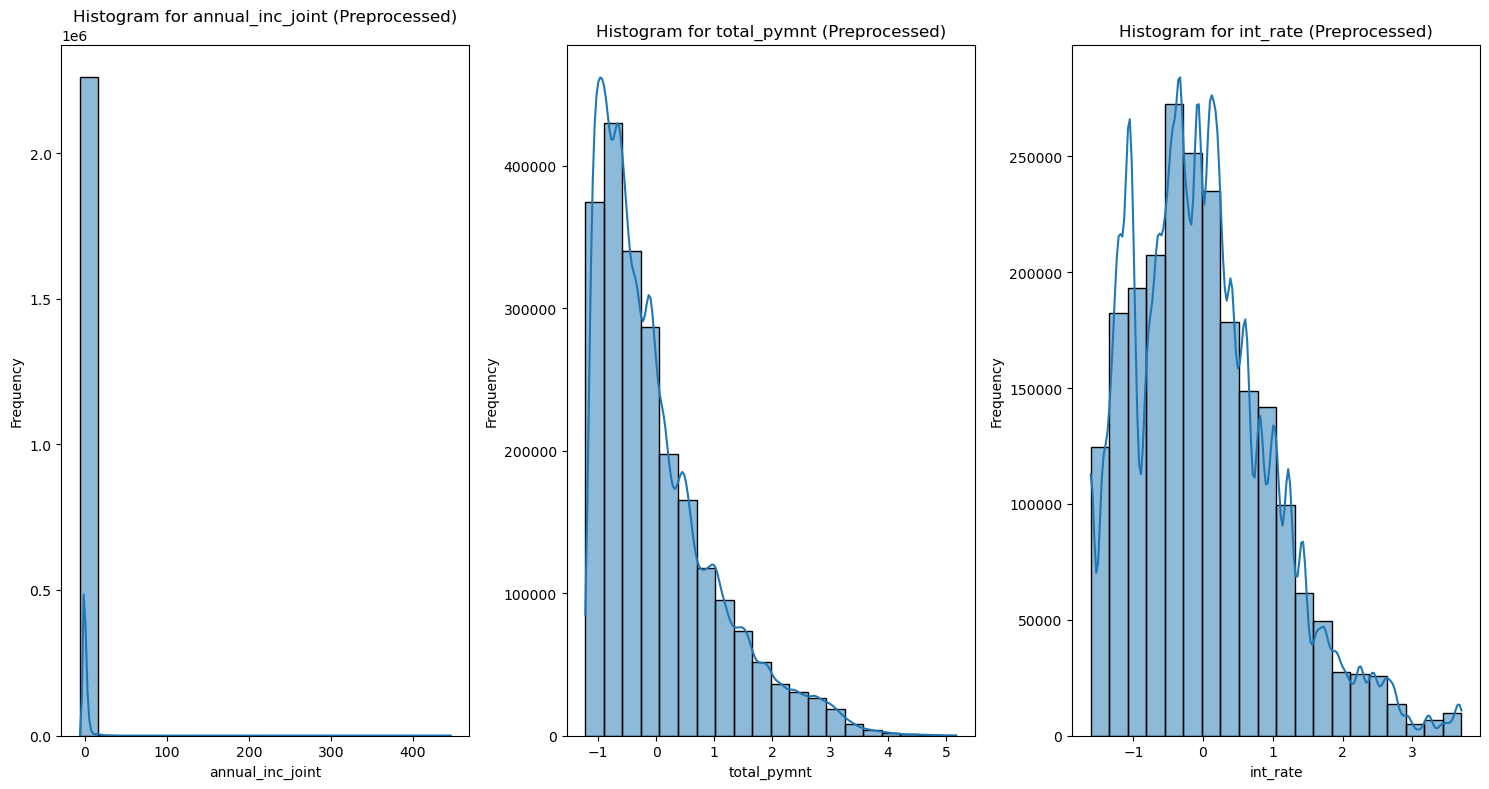

In [31]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(data_transformed[column], bins=20, kde=True)
    plt.title(f'Histogram for {column} (Preprocessed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [32]:
data_transformed.isnull().sum()

annual_inc_joint    0
total_pymnt         0
int_rate            0
addr_state          0
hardship_status     0
sub_grade           0
dtype: int64

In [33]:
data_transformed.describe()

,annual_inc_joint,total_pymnt,int_rate,addr_state,hardship_status,sub_grade
count,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06
mean,5.012249e-15,-7.988801e-16,-1.839144e-15,2.314744e+01,2.993433e+00,1.028019e+01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.505247e+01,1.036203e-01,6.301034e+00
min,-6.033574e+00,-1.220294e+00,-1.610649e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-4.178976e-02,-7.610976e-01,-7.456014e-01,9.000000e+00,3.000000e+00,6.000000e+00
50%,-4.178976e-02,-2.780234e-01,-9.785021e-02,2.300000e+01,3.000000e+00,1.000000e+01
75%,-4.178976e-02,4.906594e-01,5.995688e-01,3.500000e+01,3.000000e+00,1.400000e+01
max,4.460008e+02,5.172481e+00,3.703808e+00,5.100000e+01,3.000000e+00,3.500000e+01


In [34]:
for col in cat_cols:
    print(col,' Unique Replacement Check ->', filtered_data[col].nunique() == data_transformed[col].nunique())

addr_state  Unique Replacement Check -> True
hardship_status  Unique Replacement Check -> True
sub_grade  Unique Replacement Check -> True


Standard Deviation of 1 for all original numerical values means that this is properly scaled. Nice! And it seems the categoricals are taken care of too as the same # of unique values exist before and after the encoding

# Takeaways and Reflection

This data was quite large so randomly slecting the numerical and categorical attributes was a little tricky as I had to check if the chosen ones were too large of a task for the assignment or not. Of course in a real production environemnt you would have to handle all these. But in a case like this I would probably look into dimensionality reduction and ask business for metadata info to see if some of these attributes can be completely ignored.